In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

import tensorflow_hub as hub

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VERIFY/verify_dataset_clean.csv')
df.sample(5)

,Judul,Label
1034,rekomendasi acara m mahendra maskur sinaga ant...,1
2187,foto pupuk cendana memang jamian mutu,1
820,raja arab saudi tetap habib rizieq turun ke38 ...,1
2294,fpa siap dukung jokowi syarat semua laskar ang...,1
4199,hasil hitung luar negri luarbiasa,1


In [4]:
x_train_text, x_test_text, y_train, y_test = train_test_split(df['Judul'], df['Label'], test_size=0.1)

In [5]:
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-id-dim128/2",
                           input_shape=[], dtype=tf.string, trainable=True)

In [6]:
modelv = tf.keras.Sequential()
modelv.add(hub_layer)
modelv.add(tf.keras.layers.Dense(1, activation='sigmoid'))

modelv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 128)               112461824 
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 112,461,953
Trainable params: 112,461,953
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = Adam()
modelv.compile(optimizer = opt,
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [8]:
history = modelv.fit(x_train_text, y_train,
                    validation_data = (x_test_text, y_test),
                    epochs = 5,
                    shuffle = True
                    )

Epoch 1/5
205/205 [==============================] - 22s 95ms/step - loss: 0.5953 - accuracy: 0.7171 - val_loss: 0.4979 - val_accuracy: 0.8132
Epoch 2/5
205/205 [==============================] - 19s 94ms/step - loss: 0.3729 - accuracy: 0.8650 - val_loss: 0.4302 - val_accuracy: 0.8310
Epoch 3/5
205/205 [==============================] - 19s 94ms/step - loss: 0.2490 - accuracy: 0.9153 - val_loss: 0.4359 - val_accuracy: 0.8352
Epoch 4/5
205/205 [==============================] - 19s 94ms/step - loss: 0.1735 - accuracy: 0.9467 - val_loss: 0.4694 - val_accuracy: 0.8269
Epoch 5/5
205/205 [==============================] - 19s 94ms/step - loss: 0.1238 - accuracy: 0.9649 - val_loss: 0.5081 - val_accuracy: 0.8132


In [10]:
#x = 'berolahraga dapat membuat tidur lebih nyenyak'

#prediksi_hoax *= 100
#print('Berita ini ditulis {:.2f}% mirip dengan penulisan berita hoax yang tersebar di Indonesia'.format(prediksi_hoax[0][0]))

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve

prediksi_hoax = modelv.predict([x_test_text])

auc = roc_auc_score(y_test, prediksi_hoax)
fpr, tpr, thresholds = roc_curve(y_test, prediksi_hoax)

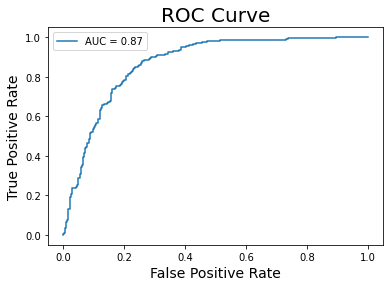

In [16]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()